In [33]:
import os
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math
from scipy.spatial import ConvexHull

In [2]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display
    
    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
    
    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [3]:
# vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
vectorizer = TfidfVectorizer(stop_words='english')
ch2 = SelectKBest(chi2, k=1000)
# categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
#               'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
#               'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
#               'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
#               'talk.politics.misc', 'talk.religion.misc']
initial_categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
              'rec.sport.hockey', 'sci.electronics', 'soc.religion.christian', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']
comp_class = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                   'comp.sys.mac.hardware', 'comp.windows.x', 'sci.electronics']
religion_class = ['alt.atheism', 'talk.religion.misc', 'soc.religion.christian']
sport_class = ['rec.sport.baseball', 'rec.sport.hockey']
auto_class = ['rec.autos', 'rec.motorcycles']
polit_class = ['talk.politics.mideast', 'talk.politics.misc']
target_classes_lbls = [religion_class, comp_class, sport_class, auto_class, polit_class]

In [4]:
ng_train = fetch_20newsgroups(subset='train', categories=initial_categories)
print ng_train.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']


In [5]:
print ng_train['target_names']

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.electronics', 'soc.religion.christian', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
vectors_train = vectorizer.fit_transform(ng_train.data)
vectors_train

<8401x108341 sparse matrix of type '<type 'numpy.float64'>'
	with 946225 stored elements in Compressed Sparse Row format>

In [7]:
df = pd.DataFrame(data=vectors_train.copy().toarray())
df

,0,1,2,3,4,5,6,7,8,9,...,108331,108332,108333,108334,108335,108336,108337,108338,108339,108340
0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.064979,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
desc = df.describe(percentiles=[0.5, 0.8, 0.9, 0.95])
desc

,0,1,2,3,4,5,6,7,8,9,...,108331,108332,108333,108334,108335,108336,108337,108338,108339,108340
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,...,8.401000e+03,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,0.002450,0.002227,0.000031,0.000010,0.000019,0.000065,0.000042,0.000010,0.000008,0.000037,...,3.584220e-07,0.000020,0.000047,0.000015,0.000027,0.000042,0.000016,0.000016,0.000030,0.000042
std,0.019191,0.016680,0.001526,0.000875,0.001702,0.002720,0.002255,0.000923,0.000775,0.003404,...,3.285188e-05,0.001811,0.002333,0.001332,0.001775,0.002316,0.001480,0.001480,0.001919,0.002316
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.912009,0.554694,0.091044,0.080186,0.155980,0.137950,0.147650,0.084587,0.071049,0.311960,...,3.011103e-03,0.166035,0.169367,0.122124,0.116001,0.161591,0.135687,0.135687,0.133822,0.161591


In [19]:
# data1 = df.copy()
# data1 = df
counter = 0
cols = []
for col_name in log_progress(desc.columns):
    if desc[col_name]['90%'] == 0.0:
#         data1.drop(col_name, axis=1, inplace=True)
        counter += 1
    else:
        cols.append(col_name)
print counter
print cols

108276
[1735, 24247, 26821, 27080, 30579, 31220, 33790, 34219, 35948, 38819, 39528, 39912, 39913, 39993, 41665, 49254, 49323, 49396, 51778, 52932, 58778, 60551, 62347, 62768, 62882, 63187, 63477, 65395, 65486, 71745, 72045, 72086, 72666, 74974, 77077, 78542, 78902, 79657, 81626, 82835, 82893, 83911, 84715, 86717, 87089, 91655, 92431, 92997, 94991, 95195, 95199, 95203, 95557, 98765, 99377, 99393, 99396, 99430, 100424, 102314, 102505, 103824, 103852, 104031, 106537]


In [20]:
data2 = data1[cols]
data2

,1735,24247,26821,27080,30579,31220,33790,34219,35948,38819,...,99393,99396,99430,100424,102314,102505,103824,103852,104031,106537
0,0.000000,0.012001,0.043632,0.021935,0.000000,0.000000,0.000000,0.000000,0.000000,0.040020,...,0.036428,0.000000,0.000000,0.000000,0.038510,0.036754,0.020376,0.018804,0.022642,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060135,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.050083,0.000000,0.000000,0.042586,0.047219,0.043576,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045549,0.139263,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.039668,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023341,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020800,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.092534,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049726,0.080869,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028277,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044407,0.000000,0.000000,0.000000
7,0.000000,0.027083,0.000000,0.000000,0.000000,0.000000,0.058560,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.082492,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.033724,0.039051,0.000000,0.000000,0.060224,...,0.000000,0.031199,0.032523,0.000000,0.000000,0.000000,0.000000,0.000000,0.017036,0.000000


In [21]:
data2.describe(percentiles=[0.5, 0.8, 0.9])

,1735,24247,26821,27080,30579,31220,33790,34219,35948,38819,...,99393,99396,99430,100424,102314,102505,103824,103852,104031,106537
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,...,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,0.005234,0.013148,0.005234,0.004575,0.011038,0.004202,0.022374,0.006125,0.008274,0.005904,...,0.007884,0.005027,0.004945,0.006704,0.006304,0.006640,0.005551,0.006896,0.013477,0.004480
std,0.017953,0.017109,0.019085,0.015690,0.029216,0.015031,0.033494,0.020021,0.027303,0.016948,...,0.020117,0.015039,0.016284,0.018261,0.017119,0.016701,0.016881,0.018647,0.015908,0.015057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008636,0.000000
80%,0.000000,0.026983,0.000000,0.000000,0.000000,0.000000,0.050858,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026331,0.000000
90%,0.017529,0.036730,0.017659,0.015106,0.047256,0.002807,0.073043,0.027698,0.029713,0.028478,...,0.033699,0.024954,0.019599,0.031108,0.029719,0.030466,0.026290,0.031481,0.034917,0.014544
max,0.332024,0.141865,0.286732,0.242794,0.216184,0.294075,0.278209,0.400605,0.283222,0.160446,...,0.220230,0.166713,0.219838,0.204667,0.166518,0.183529,0.247620,0.219456,0.145950,0.202739


In [24]:
X_filt = data2.as_matrix()
X_filt.shape

(8401, 65)

In [40]:
X = X_filt.copy()
y = ng_train['target'].copy()
for i_el, el in enumerate(y):
    cat_name = ng_train['target_names'][el]
    for i_c, cl in enumerate(target_classes_lbls):
        if cat_name in cl:
            y[i_el] = i_c
            break
lbls = ['religion', 'computers', 'sport', 'auto-moto', 'politics']

In [41]:
agc = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X, y)

In [42]:
error = np.mean(agc.labels_ != y)
print error

0.83942387811


---

In [43]:
pca_tr = PCA(2)

In [44]:
X_tr = pca_tr.fit_transform(X)

In [45]:
def get_dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

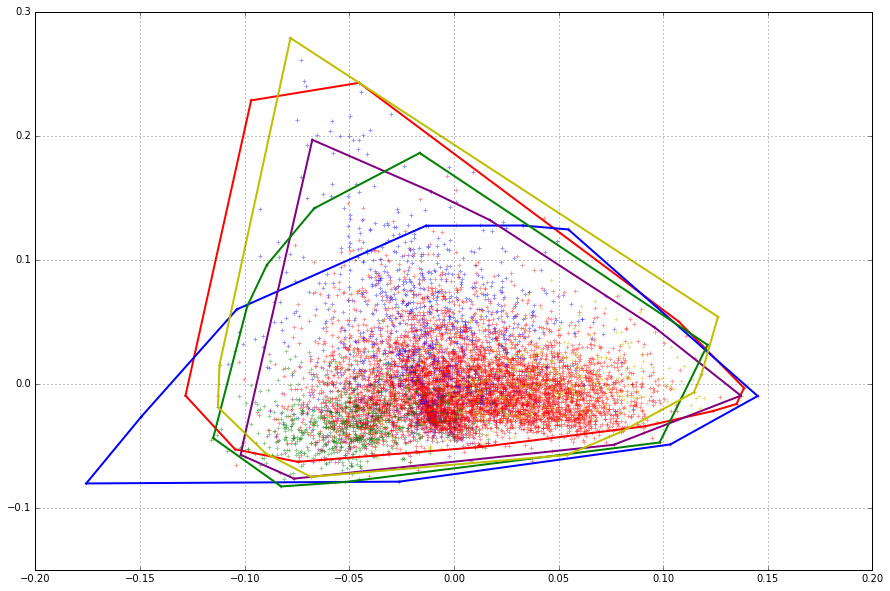

In [46]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

colors = ['r', 'b', 'purple', 'g', 'y']
for i in range(5):
    x_pred = X_tr[:, 0][agc.labels_ == i]
    y_pred = X_tr[:, 1][agc.labels_ == i]
    plt.scatter(x_pred, y_pred, c=colors[i], alpha=0.4, marker='+')
#     x_real = X_tr[:, 0][y == i]
#     y_real = X_tr[:, 1][y == i]
#     x_c = np.mean(x_real)
#     y_c = np.mean(y_real)
#     r = 0
#     for tmp_x, tmp_y in X_tr:
#         tmp_r = get_dist(tmp_x, tmp_y, x_c, y_c)
#         if tmp_r > r:
#             r = tmp_r
#     print r
#     c = plt.Circle((x_c, y_c), r, color=colors[i], fill=False)
#     ax.add_patch(c)
    xy = X_tr[y == i]
    hull = ConvexHull(xy)
    for simplex in hull.simplices:
        plt.plot(xy[simplex, 0], xy[simplex, 1], colors[i], linewidth=2.0)

plt.grid(True)